In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Loading the dataset
si_df = pd.read_csv('synthetic_insurance_data.csv', delimiter=',')

In [3]:
# Showing the first 5 rows
si_df.head(5)

,Age,Is_Senior,Marital_Status,Married_Premium_Discount,Prior_Insurance,Prior_Insurance_Premium_Adjustment,Claims_Frequency,Claims_Severity,Claims_Adjustment,Policy_Type,...,Time_Since_First_Contact,Conversion_Status,Website_Visits,Inquiries,Quotes_Requested,Time_to_Conversion,Credit_Score,Premium_Adjustment_Credit,Region,Premium_Adjustment_Region
0,47,0,Married,86,1-5 years,50,0,Low,0,Full Coverage,...,10,0,5,1,2,99,704,-50,Suburban,50
1,37,0,Married,86,1-5 years,50,0,Low,0,Full Coverage,...,22,0,5,1,2,99,726,-50,Urban,100
2,49,0,Married,86,1-5 years,50,1,Low,50,Full Coverage,...,28,0,4,4,1,99,772,-50,Urban,100
3,62,1,Married,86,>5 years,0,1,Low,50,Full Coverage,...,4,1,6,2,2,2,809,-50,Urban,100
4,36,0,Single,0,>5 years,0,2,Low,100,Full Coverage,...,14,1,8,4,2,10,662,50,Suburban,50


In [4]:
'''
    Which categories are we working with?
'''
# Show the type of all columns on a dataframe
for column in si_df.columns:
    print(f'Column = {column}, Type = {si_df[column].dtype}\n')

Column = Age, Type = int64

Column = Is_Senior, Type = int64

Column = Marital_Status, Type = object

Column = Married_Premium_Discount, Type = int64

Column = Prior_Insurance, Type = object

Column = Prior_Insurance_Premium_Adjustment, Type = int64

Column = Claims_Frequency, Type = int64

Column = Claims_Severity, Type = object

Column = Claims_Adjustment, Type = int64

Column = Policy_Type, Type = object

Column = Policy_Adjustment, Type = int64

Column = Premium_Amount, Type = int64

Column = Safe_Driver_Discount, Type = int64

Column = Multi_Policy_Discount, Type = int64

Column = Bundling_Discount, Type = int64

Column = Total_Discounts, Type = int64

Column = Source_of_Lead, Type = object

Column = Time_Since_First_Contact, Type = int64

Column = Conversion_Status, Type = int64

Column = Website_Visits, Type = int64

Column = Inquiries, Type = int64

Column = Quotes_Requested, Type = int64

Column = Time_to_Conversion, Type = int64

Column = Credit_Score, Type = int64

Column = 

In [5]:
'''
    Is the dataset correctly filled?
'''
# Verifying null values
print(si_df.isnull().sum())

Age                                   0
Is_Senior                             0
Marital_Status                        0
Married_Premium_Discount              0
Prior_Insurance                       0
Prior_Insurance_Premium_Adjustment    0
Claims_Frequency                      0
Claims_Severity                       0
Claims_Adjustment                     0
Policy_Type                           0
Policy_Adjustment                     0
Premium_Amount                        0
Safe_Driver_Discount                  0
Multi_Policy_Discount                 0
Bundling_Discount                     0
Total_Discounts                       0
Source_of_Lead                        0
Time_Since_First_Contact              0
Conversion_Status                     0
Website_Visits                        0
Inquiries                             0
Quotes_Requested                      0
Time_to_Conversion                    0
Credit_Score                          0
Premium_Adjustment_Credit             0


In [6]:
# Verifying category ditribution
print(si_df['Policy_Type'].value_counts(), '\n')

# Calculating percentage of each category
for category_name, count in si_df['Policy_Type'].value_counts().items():
    print(f'{count / si_df.shape[0] * 100:.2f}% are {category_name}')

Policy_Type
Full Coverage     6007
Liability-Only    3993
Name: count, dtype: int64 

60.07% are Full Coverage
39.93% are Liability-Only


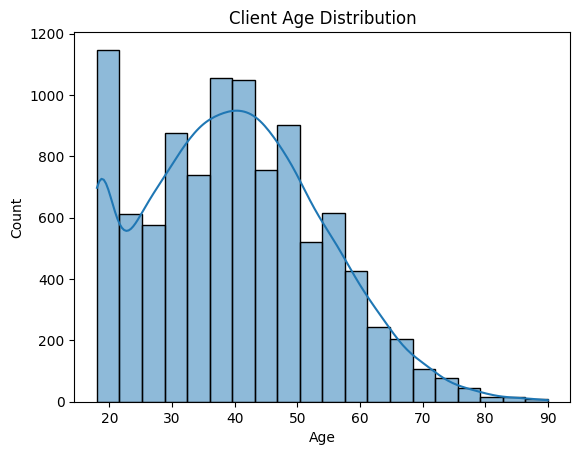

,Age
count,10000.000000
mean,39.991700
std,14.050358
min,18.000000
25%,29.000000
50%,39.000000
75%,50.000000
max,90.000000


In [7]:
'''
    Understanding client age distribution
'''
# Age distribution
sns.histplot(si_df['Age'], bins=20, kde=True)
plt.title("Client Age Distribution")
plt.show()

# Other stats
age_stats = si_df['Age'].describe()
age_mean = age_stats['mean']
age_min = age_stats['min']
age_max = age_stats['max']
age_std = age_stats['std']
age_stats.to_frame()

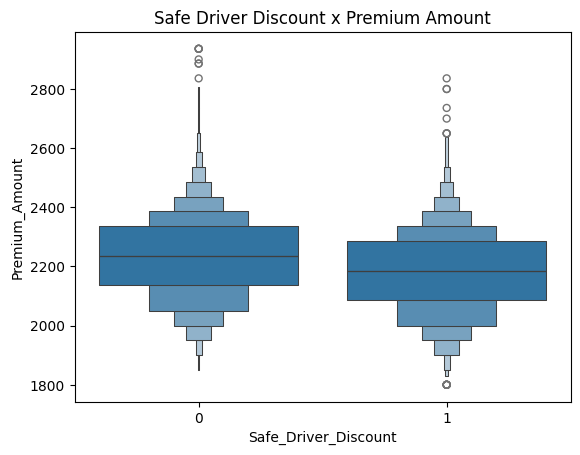

In [8]:
'''
    How many clients have earned a safe driver discount?
'''
# Discount impact (safe driver discount)
sns.boxenplot(x=si_df["Safe_Driver_Discount"], y=si_df["Premium_Amount"])
plt.title("Safe Driver Discount x Premium Amount")
plt.show()

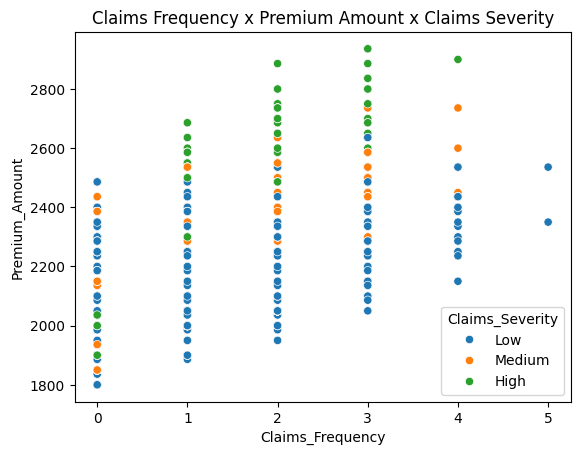

In [9]:
'''
    Which is the correlation between claims frequency, claims severity and premium amount?
'''
# Analyzing claims frequency x claims severity x premium amount
sns.scatterplot(x=si_df['Claims_Frequency'], y=si_df['Premium_Amount'], hue=si_df['Claims_Severity'])
plt.title("Claims Frequency x Premium Amount x Claims Severity")
plt.show()

In [10]:
'''
    How many times the policy has been claimed?
'''
# Analyzing claims frequency
claims_frequency_stats = si_df['Claims_Frequency'].describe()
claims_frequency_mean = claims_frequency_stats['mean']
claims_frequency_min = claims_frequency_stats['min']
claims_frequency_max = claims_frequency_stats['max']
claims_frequncy_std = claims_frequency_stats['std']
claims_frequency_stats.to_frame()

,Claims_Frequency
count,10000.000000
mean,0.497200
std,0.716131
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,5.000000


In [11]:
# Analyzing premium adjustment credit, premium adjustment region, policy adjustment and claims adjustment
for column in ['Premium_Adjustment_Credit', 'Premium_Adjustment_Region', 'Policy_Adjustment', 'Claims_Adjustment']:
    print(f'Column = {column}, Type = {si_df[column].dtype}\n')
    print(si_df[column].describe().to_frame())
    print('\n')

Column = Premium_Adjustment_Credit, Type = int64

       Premium_Adjustment_Credit
count               10000.000000
mean                  -11.320000
std                    48.704156
min                   -50.000000
25%                   -50.000000
50%                   -50.000000
75%                    50.000000
max                    50.000000


Column = Premium_Adjustment_Region, Type = int64

       Premium_Adjustment_Region
count               10000.000000
mean                   64.325000
std                    39.232618
min                     0.000000
25%                    50.000000
50%                    50.000000
75%                   100.000000
max                   100.000000


Column = Policy_Adjustment, Type = int64

       Policy_Adjustment
count       10000.000000
mean          -79.860000
std            97.955806
min          -200.000000
25%          -200.000000
50%             0.000000
75%             0.000000
max             0.000000


Column = Claims_Adjustment, Type 

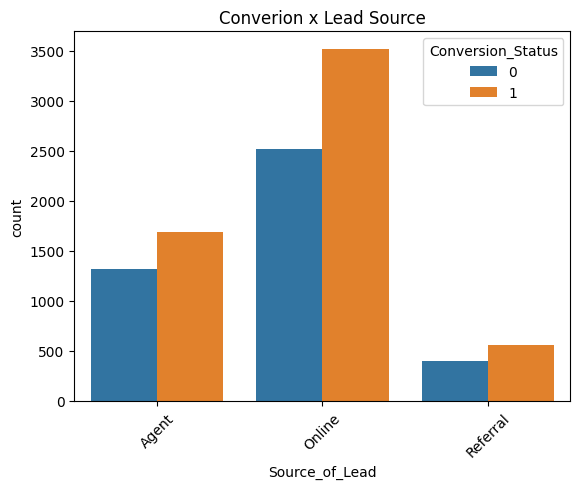

In [12]:
'''
    Which source of leads generate more conversions?
'''
# Analyzing leads source x conversion status
sns.countplot(x=si_df["Source_of_Lead"], hue=si_df["Conversion_Status"])
plt.title("Converion x Lead Source")
plt.xticks(rotation=45)
plt.show()

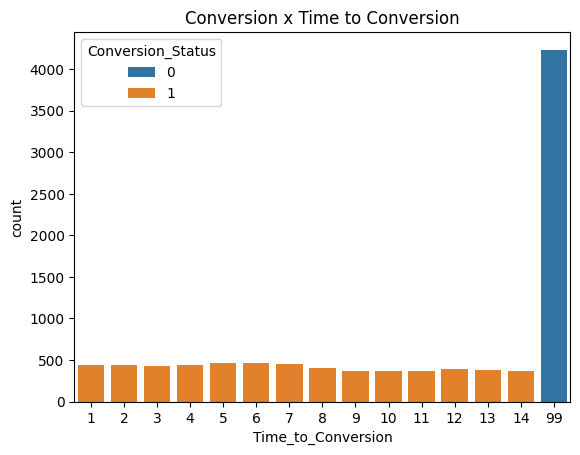

In [13]:
'''
    Does time to conversion influence the conversion?
'''
# Analyzing time to conversion x conversion status
sns.countplot(x=si_df["Time_to_Conversion"], hue=si_df["Conversion_Status"])
plt.title("Conversion x Time to Conversion")
plt.show()

In [14]:
'''
    Will the client convert to the insurance policy given the selected data?
    data: age (might indicate risk), credit score (might indicate payment capability), website visits (might indicate interest), quotes requested (might also indicate interest)
    target: conversion status (0 = no conversion, 1 = conversion) 
'''
# Analyzing conversion status (prediction using sklearn)
# Features and target
X = si_df[['Age', 'Credit_Score', 'Website_Visits', 'Quotes_Requested']]
y = si_df['Conversion_Status']

# Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model accuracy after training
y_pred = model.predict(X_test)
print(f"Trained model accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

Trained model accuracy: 52.30%


In [15]:
# Testing the trained model to predict a new client
# Creating a fictional client
new_client = pd.DataFrame({'Age': [27], 'Credit_Score': [850], 'Website_Visits': [3], 'Quotes_Requested': [2]})

# Predicting using the trained model
new_client_prediction = model.predict(new_client)
print(new_client_prediction)

# Results
if new_client_prediction[0] == 1:
    print("The client will convert to the insurance policy")
else:
    print("The client will not convert to the insurance policy")

[1]
The client will convert to the insurance policy


In [16]:
# Testing the trained model to predict multiple new clients at once
# Creating fictional clients
new_clients = pd.DataFrame({
    'Age': [25, 40, 60, 18, 33, 55, 68, 45, 32, 50],
    'Credit_Score': [683, 751, 699, 510, 644, 708, 809, 750, 624, 743],
    'Website_Visits': [3, 8, 1, 5, 2, 9, 6, 7, 4, 10],
    'Quotes_Requested': [1, 4, 2, 3, 1, 5, 3, 4, 2, 6]
})

# Predicting using the trained model
new_clients_prediction = model.predict(new_clients)

# Adding predictions to dataframe
new_clients['Conversion_Prediction'] = new_clients_prediction

print(new_clients)


   Age  Credit_Score  Website_Visits  Quotes_Requested  Conversion_Prediction
0   25           683               3                 1                      1
1   40           751               8                 4                      1
2   60           699               1                 2                      0
3   18           510               5                 3                      0
4   33           644               2                 1                      1
5   55           708               9                 5                      1
6   68           809               6                 3                      1
7   45           750               7                 4                      0
8   32           624               4                 2                      0
9   50           743              10                 6                      1
